In [134]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
from value import Value
from graph import *

In [136]:

a = Value(2, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label='d'
f = Value(data=-2.0, label='f')
L = f * d; L.label = 'L'

In [137]:
d._prev

{Value(data=-6.0 label=e), Value(data=10.0 label=c)}

In [138]:
d._op

'+'

In [139]:
nodes, edges = trace(d)
nodes

{Value(data=-3.0 label=b),
 Value(data=-6.0 label=e),
 Value(data=10.0 label=c),
 Value(data=2 label=a),
 Value(data=4.0 label=d)}

In [140]:
edges

{(Value(data=-3.0 label=b), Value(data=-6.0 label=e)),
 (Value(data=-6.0 label=e), Value(data=4.0 label=d)),
 (Value(data=10.0 label=c), Value(data=4.0 label=d)),
 (Value(data=2 label=a), Value(data=-6.0 label=e))}

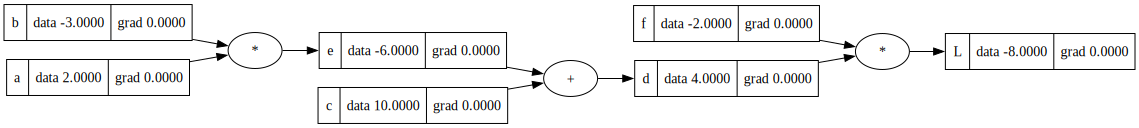

In [141]:
draw_dot(L)

In [167]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b 
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

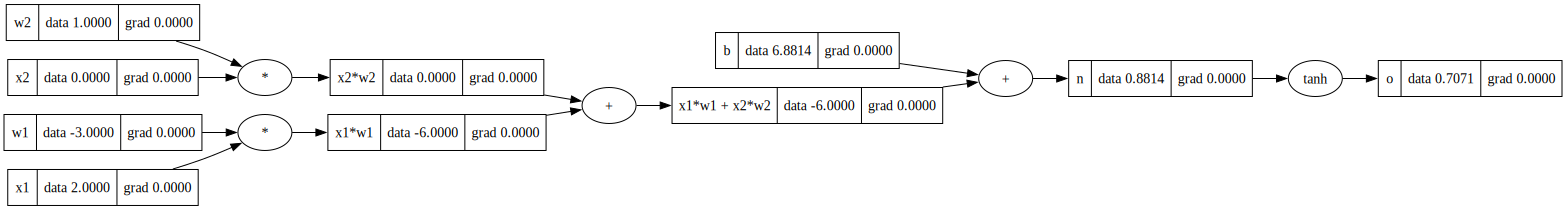

In [ ]:
draw_dot(o) 

In [164]:
# Topological sort and call backward
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=1.0 label=w2),
 Value(data=0.0 label=x2),
 Value(data=0.0 label=x2*w2),
 Value(data=-3.0 label=w1),
 Value(data=2.0 label=x1),
 Value(data=-6.0 label=x1*w1),
 Value(data=-6.0 label=x1*w1 + x2*w2),
 Value(data=6.881373587019543 label=b),
 Value(data=0.8813735870195432 label=n),
 Value(data=0.7071067811865476 label=o)]

In [165]:
for node in reversed(topo):
    node._backward()

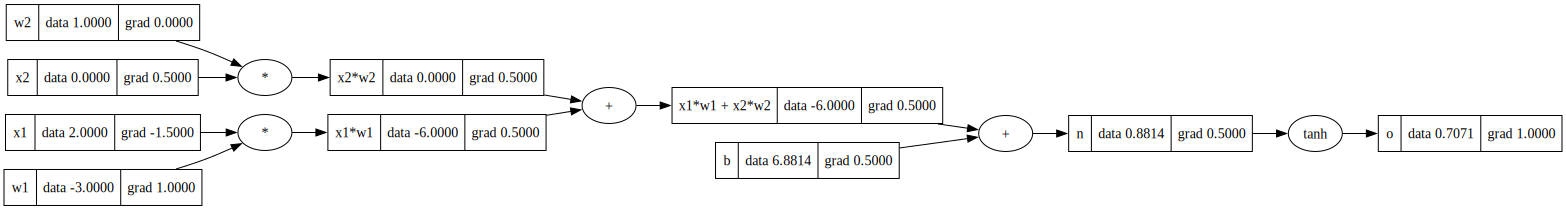

In [166]:
draw_dot(o)

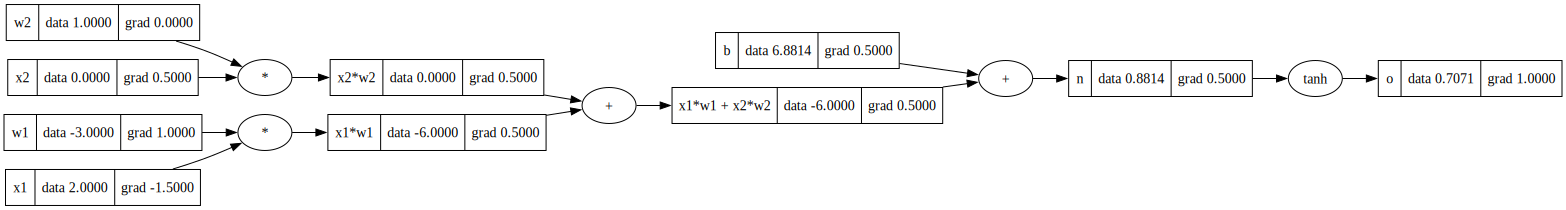

In [191]:
a = Value(2.0)
b = Value(4.0)
b / a

Value(data=2.0 label= grad=0.0)

Value(data=-2.0 label= grad=0.0)